![](https://miro.medium.com/max/1262/1*LBn_F2ALsKUAKK6vbQbJuw.png)

## 简介
新闻媒体已成为向世界人民传递世界上正在发生的事情的信息的渠道。 人们通常认为新闻中传达的一切都是真实的。 在某些情况下，甚至新闻频道也承认他们的新闻不如他们写的那样真实。 但是，一些新闻不仅对人民或政府产生重大影响，而且对经济也产生重大影响。 一则新闻可以根据人们的情绪和政治局势上下移动曲线。

从真实的真实新闻中识别虚假新闻非常重要。 该问题已通过自然语言处理工具解决并得到了解决，本篇文章可帮助我们根据历史数据识别假新闻或真实新闻。

## 问题描述

对于印刷媒体和数字媒体，信息的真实性已成为影响企业和社会的长期问题。在社交网络上，信息传播的范围和影响以如此快的速度发生，并且如此迅速地放大，以至于失真，不准确或虚假的信息具有巨大的潜力，可在数分钟内对数百万用户造成现实世界的影响。最近，人们表达了对该问题的一些担忧，并提出了一些缓解该问题的方法。

在各种信息广播的整个历史中，一直存在着不那么精确的引人注目和引人入胜的新闻标题，这些新闻标题旨在吸引观众的注意力来出售信息。但是，在社交网站上，信息传播的范围和影响得到了显着放大，并且发展速度如此之快，以至于失真，不准确或虚假的信息具有巨大的潜力，可在数分钟内为数百万的用户带来真正的影响。


## 目标
- 我们唯一的目标是将数据集中的新闻分类为假新闻或真实新闻。 
- 新闻的细致EDA 
- 选择并建立强大的分类模型

## 导入相关库
让我们导入所有必要的库以进行文本分析，并且将对数据集进行清洗

In [2]:
# 基本数据包：pandas和numpy
import pandas as pd 
import numpy as np 

# 可视化包
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# NLTK 包
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Machine Learning libraries
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 

# 评估
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# 集合
from collections import Counter

# 忽略警告
import warnings
warnings.filterwarnings('ignore')

# 深度学习
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

## 加载数据
加载我们用到的数据集，看看表格中有哪些字段

数据下载链接：https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

In [4]:
# 读取数据集
fake_news = pd.read_csv('data/Fake.csv')
true_news = pd.read_csv('data/True.csv')

# 虚假新闻数据集的大小以及字段
print ("The shape of the  data is (row, column):"+ str(fake_news.shape))
print (fake_news.info())
print("\n --------------------------------------- \n")

# 真实新闻数据集的大小以及字段
print ("The shape of the  data is (row, column):"+ str(true_news.shape))
print (true_news.info())


The shape of the  data is (row, column):(23481, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None

 --------------------------------------- 

The shape of the  data is (row, column):(21417, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


## 数据集的详情：

- 数据有2个CSV文件，其中一个数据集包含假新闻，另一个包真新闻，有将近23481个假新闻和21417个真新闻

文件中列名的描述:

- title-包含新闻标题

- text-包含新闻内容/文章

- subject-新闻的主题

- date-消息发布的日期

## 数据预处理与文本清洗
在执行EDA并将数据提供给模型之前，我们必须执行某些预处理步骤：

### 创建目标列
让我们为假新闻和真新闻创建目标列。在这里，我们将目标值表示为“ 0”（假新闻），“ 1”（真新闻）

In [5]:
#假新闻的目标变量
fake_news['output']=0

#真新闻的目标变量
true_news['output']=1

### 拼接新闻标题和内容

新闻是将根据标题和文本进行分类。 分开处理新闻标题和内容不会带来任何好处。 因此，我们将两个数据集中的两个列连接起来

In [6]:
#合并title与text合并为news
fake_news['news']=fake_news['title']+fake_news['text']
fake_news=fake_news.drop(['title', 'text'], axis=1)

#合并title与text合并为news
true_news['news']=true_news['title']+true_news['text']
true_news=true_news.drop(['title', 'text'], axis=1)

# 重构表格
fake_news = fake_news[['subject', 'date', 'news','output']]
true_news = true_news[['subject', 'date', 'news','output']]

### 将日期列转换为日期时间格式

我们可以使用pd.datetime将日期列转换为所需的日期格式。尤其是在fake_news date列中，让我们检查value_counts（）看看里面有什么

In [7]:
fake_news['date'].value_counts()

May 10, 2017         46
May 26, 2016         44
May 5, 2016          44
May 6, 2016          44
May 11, 2016         43
                     ..
November 20, 2017     1
Jun 21, 2015          1
December 11, 2017     1
Apr 2, 2015           1
Jul 19, 2015          1
Name: date, Length: 1681, dtype: int64

![](https://miro.medium.com/max/538/1*WWGg5eyol7LpbGXkeSzXhA.png)

如果您注意到，我们在日期列内有链接和新闻标题，这在转换为日期时间格式时会给我们带来麻烦。因此，让我们从列中删除这些记录。

In [9]:
# 删除含有链接以及Host的数据 
fake_news=fake_news[~fake_news.date.str.contains("http")]
fake_news=fake_news[~fake_news.date.str.contains("HOST")]

# '''等效'''
#fake_news=fake_news[fake_news.date.str.contains("Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec")]

只有假新闻数据集的日期列存在问题。现在，我们将日期列转换为日期时间格式

In [10]:
# 将日期列转为时间格式
fake_news['date'] = pd.to_datetime(fake_news['date'])
true_news['date'] = pd.to_datetime(true_news['date'])

### 合并数据集
当我们为模型提供数据集时，我们必须将其作为单个文件提供。因此，最好同时添加真假新闻数据，并对其进行进一步预处理并执行EDA

In [11]:
frames = [fake_news, true_news]
news_dataset = pd.concat(frames)
news_dataset

,subject,date,news,output
0,News,2017-12-31,Donald Trump Sends Out Embarrassing New Year’...,0
1,News,2017-12-31,Drunk Bragging Trump Staffer Started Russian ...,0
2,News,2017-12-30,Sheriff David Clarke Becomes An Internet Joke...,0
3,News,2017-12-29,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,News,2017-12-25,Pope Francis Just Called Out Donald Trump Dur...,0
...,...,...,...,...
21412,worldnews,2017-08-22,'Fully committed' NATO backs new U.S. approach...,1
21413,worldnews,2017-08-22,LexisNexis withdrew two products from Chinese ...,1
21414,worldnews,2017-08-22,Minsk cultural hub becomes haven from authorit...,1
21415,worldnews,2017-08-22,Vatican upbeat on possibility of Pope Francis ...,1


## 文本处理

![](https://miro.medium.com/max/973/1*s7rcYhI1z8Hnk4-2hSQHEA.png)

对于任何文本分析应用程序来说，这都是重要的阶段。 新闻中将有很多无用的内容，这可能会阻碍机器学习模型的发展。 除非我们删除它们，否则机器学习模型将无法有效运行。 让我们一步一步走。

### 标点符号去除

In [13]:
clean_news=news_dataset.copy()
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
clean_news['news']=clean_news['news'].apply(lambda x:review_cleaning(x))
clean_news.head()

,subject,date,news,output
0,News,2017-12-31,donald trump sends out embarrassing new year’...,0
1,News,2017-12-31,drunk bragging trump staffer started russian ...,0
2,News,2017-12-30,sheriff david clarke becomes an internet joke...,0
3,News,2017-12-29,trump is so obsessed he even has obama’s name...,0
4,News,2017-12-25,pope francis just called out donald trump dur...,0


### 停用词去除
停止词是一个常用的词(例如“the”，“A”，“an”，“in”)，搜索引擎在为搜索条目建立索引和作为搜索查询的结果检索它们时都忽略它。我们不希望这些词占用数据库中的空间，或占用宝贵的处理时间。为此，我们可以很容易地删除它们，方法是存储一组你认为可以终止单词的单词。python中的NLTK(自然语言工具包)有一个以16种不同语言存储的stopwords列表。

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yanqiang\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [16]:
stop = stopwords.words('english')
clean_news['news'] = clean_news['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news.head()

,subject,date,news,output
0,News,2017-12-31,donald trump sends embarrassing new year’s eve...,0
1,News,2017-12-31,drunk bragging trump staffer started russian c...,0
2,News,2017-12-30,sheriff david clarke becomes internet joke thr...,0
3,News,2017-12-29,trump obsessed even obama’s name coded website...,0
4,News,2017-12-25,pope francis called donald trump christmas spe...,0


## 新闻的事件演变和可视化
在本节中，我们将完成对新闻的探索性数据分析，例如ngram分析，并了解哪些是所有单词，上下文（最有可能在伪造的new中找到）

### 新闻主题数

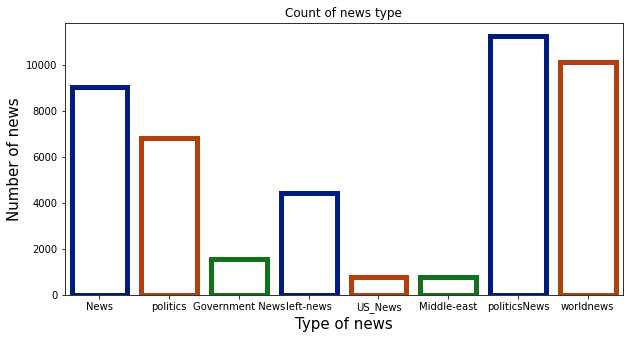

In [17]:
ax = sns.countplot(x="subject", data=clean_news,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

# 设置label与字体大小
ax.set(xlabel='Type of news', ylabel='Number of news',title='Count of news type')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

### 基于真假的新闻主题计数

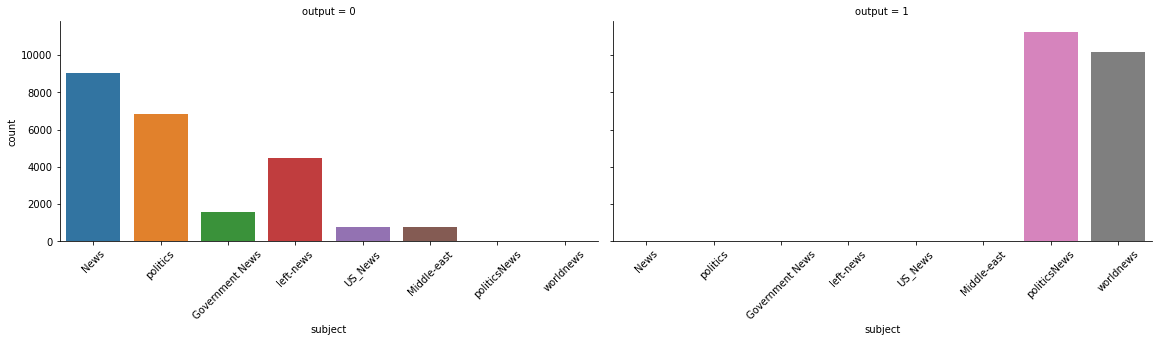

In [22]:
g = sns.catplot(x="subject", col="output",
                data=clean_news, kind="count",
                height=4, aspect=2)

# 旋转x轴
g.set_xticklabels(rotation=45)

发现：

- 假新闻无处不在，政治和世界新闻除外

- 真正的新闻只存在于政治和世界新闻中，而且数量很高

- 这是一个高度偏差的数据集，考虑到数据集的质量较差，我们可以期望更高的准确性，但这并不意味着它是一个好的模型

### 真假新闻统计

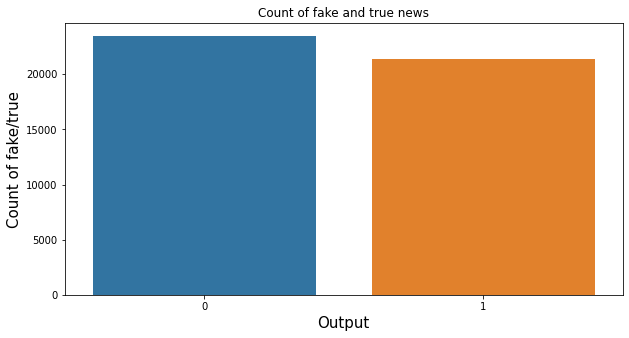

In [21]:
ax=sns.countplot(x="output", data=clean_news)

# 设置label以及字体大小
ax.set(xlabel='Output', ylabel='Count of fake/true',title='Count of fake and true news')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

发现：
- 我们有一个非常平衡的数据 
- 但是，假新闻的数量要比真实新闻的数量高，但程度不大

### 从新闻中提取新特征

让我们从新闻特征中提取更多的特征，比如

- 极性:表示新闻情感的尺度

- 评论长度:新闻的长度(字母和空格的数量)

- 单词数:新闻中单词的数量

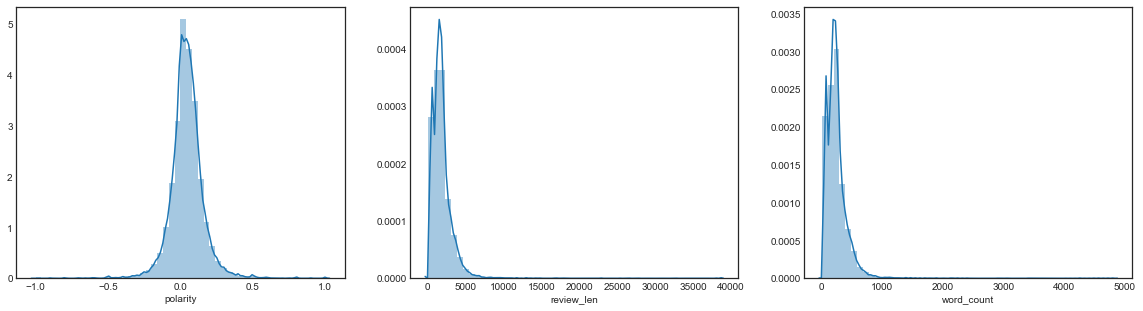

In [23]:
# 从新闻中提取新特征
clean_news['polarity'] = clean_news['news'].map(lambda text: TextBlob(text).sentiment.polarity)
clean_news['review_len'] = clean_news['news'].astype(str).apply(len)
clean_news['word_count'] = clean_news['news'].apply(lambda x: len(str(x).split()))

# 新特征分布
plt.figure(figsize = (20, 5))
plt.style.use('seaborn-white')
plt.subplot(131)
sns.distplot(clean_news['polarity'])
fig = plt.gcf()
plt.subplot(132)
sns.distplot(clean_news['review_len'])
fig = plt.gcf()
plt.subplot(133)
sns.distplot(clean_news['word_count'])
fig = plt.gcf()

发现： 
- 大部分极性是中性的，既不表示坏消息也不表示高兴消息 
- 字数在0到1000之间，新闻的长度在0到5000之间，并且接近1000个单词，这可能是一篇文章

## N-gram分析
### 新闻中的前20个词
让我们看一下新闻中的前20个词，这可以让我们简要了解一下数据集中最受欢迎的新闻

In [25]:
# 获取topn的词
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# 获取top20常见的词
common_words = get_top_n_words(clean_news['news'], 20)

# 打印词频
for word, freq in common_words:
    print(word, freq)

# 创建词与词频的dataframe
df1 = pd.DataFrame(common_words, columns = ['news' , 'count'])


df1.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in news')

trump 140400
said 130258
us 68081
would 55422
president 53189
people 41718
one 36146
state 33190
new 31799
also 31209
obama 29881
clinton 29003
house 28716
government 27392
donald 27376
reuters 27348
states 26331
republican 25287
could 24356
white 23823


发现：

- 所有前20条新闻都与美国政府有关 
- 特别是关于特朗普和美国，其次是奥巴马 
- 我们可以了解到，新闻来自路透社。

### 新闻中的topn的2个词组合 

现在，让我们将探索范围扩展到新闻中的最常见的2个词组合

In [26]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_bigram(clean_news['news'], 20)


for word, freq in common_words:
    print(word, freq)
    
df3 = pd.DataFrame(common_words, columns = ['news' , 'count'])

df3.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in news')

donald trump 25059
united states 18394
white house 15485
hillary clinton 9502
new york 8110
north korea 7053
president donald 6928
image via 6188
barack obama 5603
trump said 4816
prime minister 4753
president trump 4646
supreme court 4595
last year 4560
last week 4512
said statement 4425
fox news 4074
president obama 4065
islamic state 4014
national security 3858


发现： 
- 如我们所担心的那样，考虑到王牌新闻的数量，我认为该模型的结果会有偏差 
- 我们也可以看到朝鲜的新闻，我想这将是关于美国和NK之间的争端 
- fox 新闻也很少有新闻

In [27]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(clean_news['news'], 20)

for word, freq in common_words:
    print(word, freq)

df6 = pd.DataFrame(common_words, columns = ['news' , 'count'])

df6.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in news')

president donald trump 6808
president barack obama 3735
new york times 2034
donald trump realdonaldtrump 1790
reuters president donald 1476
black lives matter 1436
president united states 1096
white house said 1050
presidentelect donald trump 1043
new york city 1006
president vladimir putin 955
news century wire 951
national security adviser 898
affordable care act 868
director james comey 860
speaker paul ryan 851
fbi director james 778
state rex tillerson 775
secretary state rex 765
russian president vladimir 745


发现：

- 在弗洛伊德（Floyd）死后，有一个重要的新闻裁定美国媒体的“黑人生命问题”。 
- 我们可以看到新闻已经覆盖了我们的数据。 关于死亡的假新闻很多。
- 其余新闻都与美国政治有关

## 虚假和真实新闻词云

虚假和真实新闻词云 让我们看看假新闻和真实新闻这两个词云

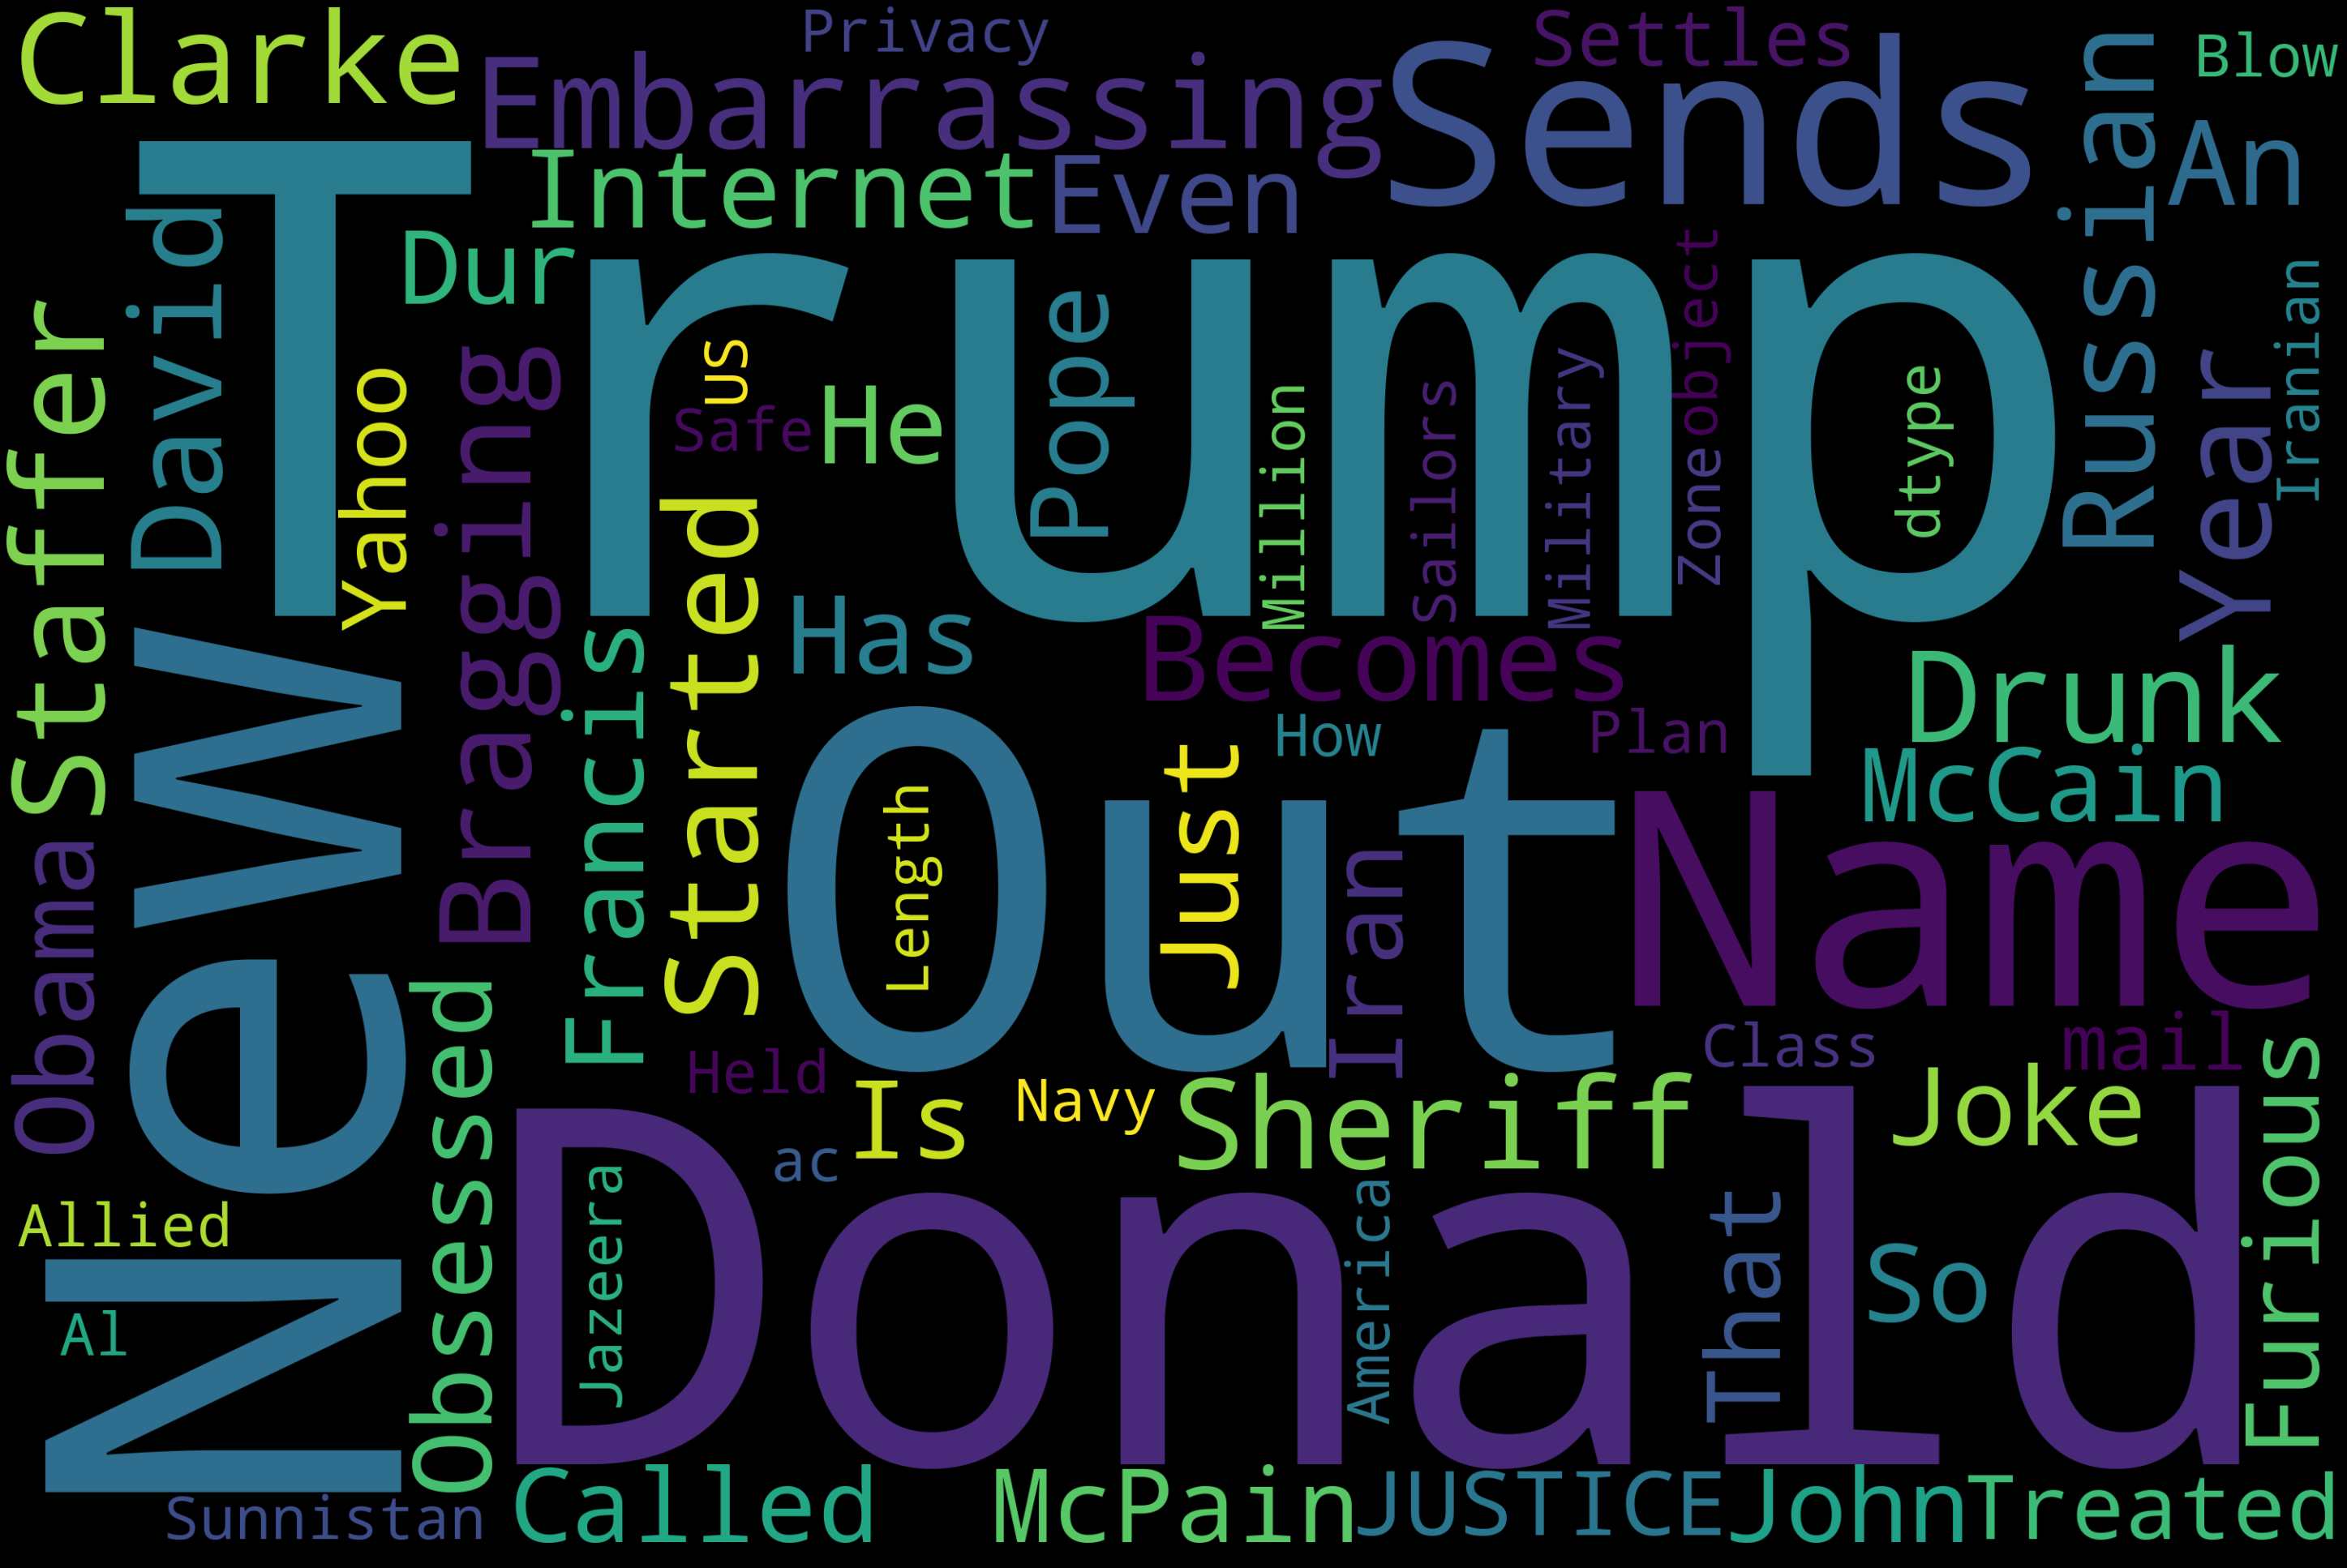

In [28]:
text = fake_news["news"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

发现
- 大多数虚假新闻都围绕唐纳德·特朗普和美国 
- 还有关于隐私，互联网等的虚假新闻，

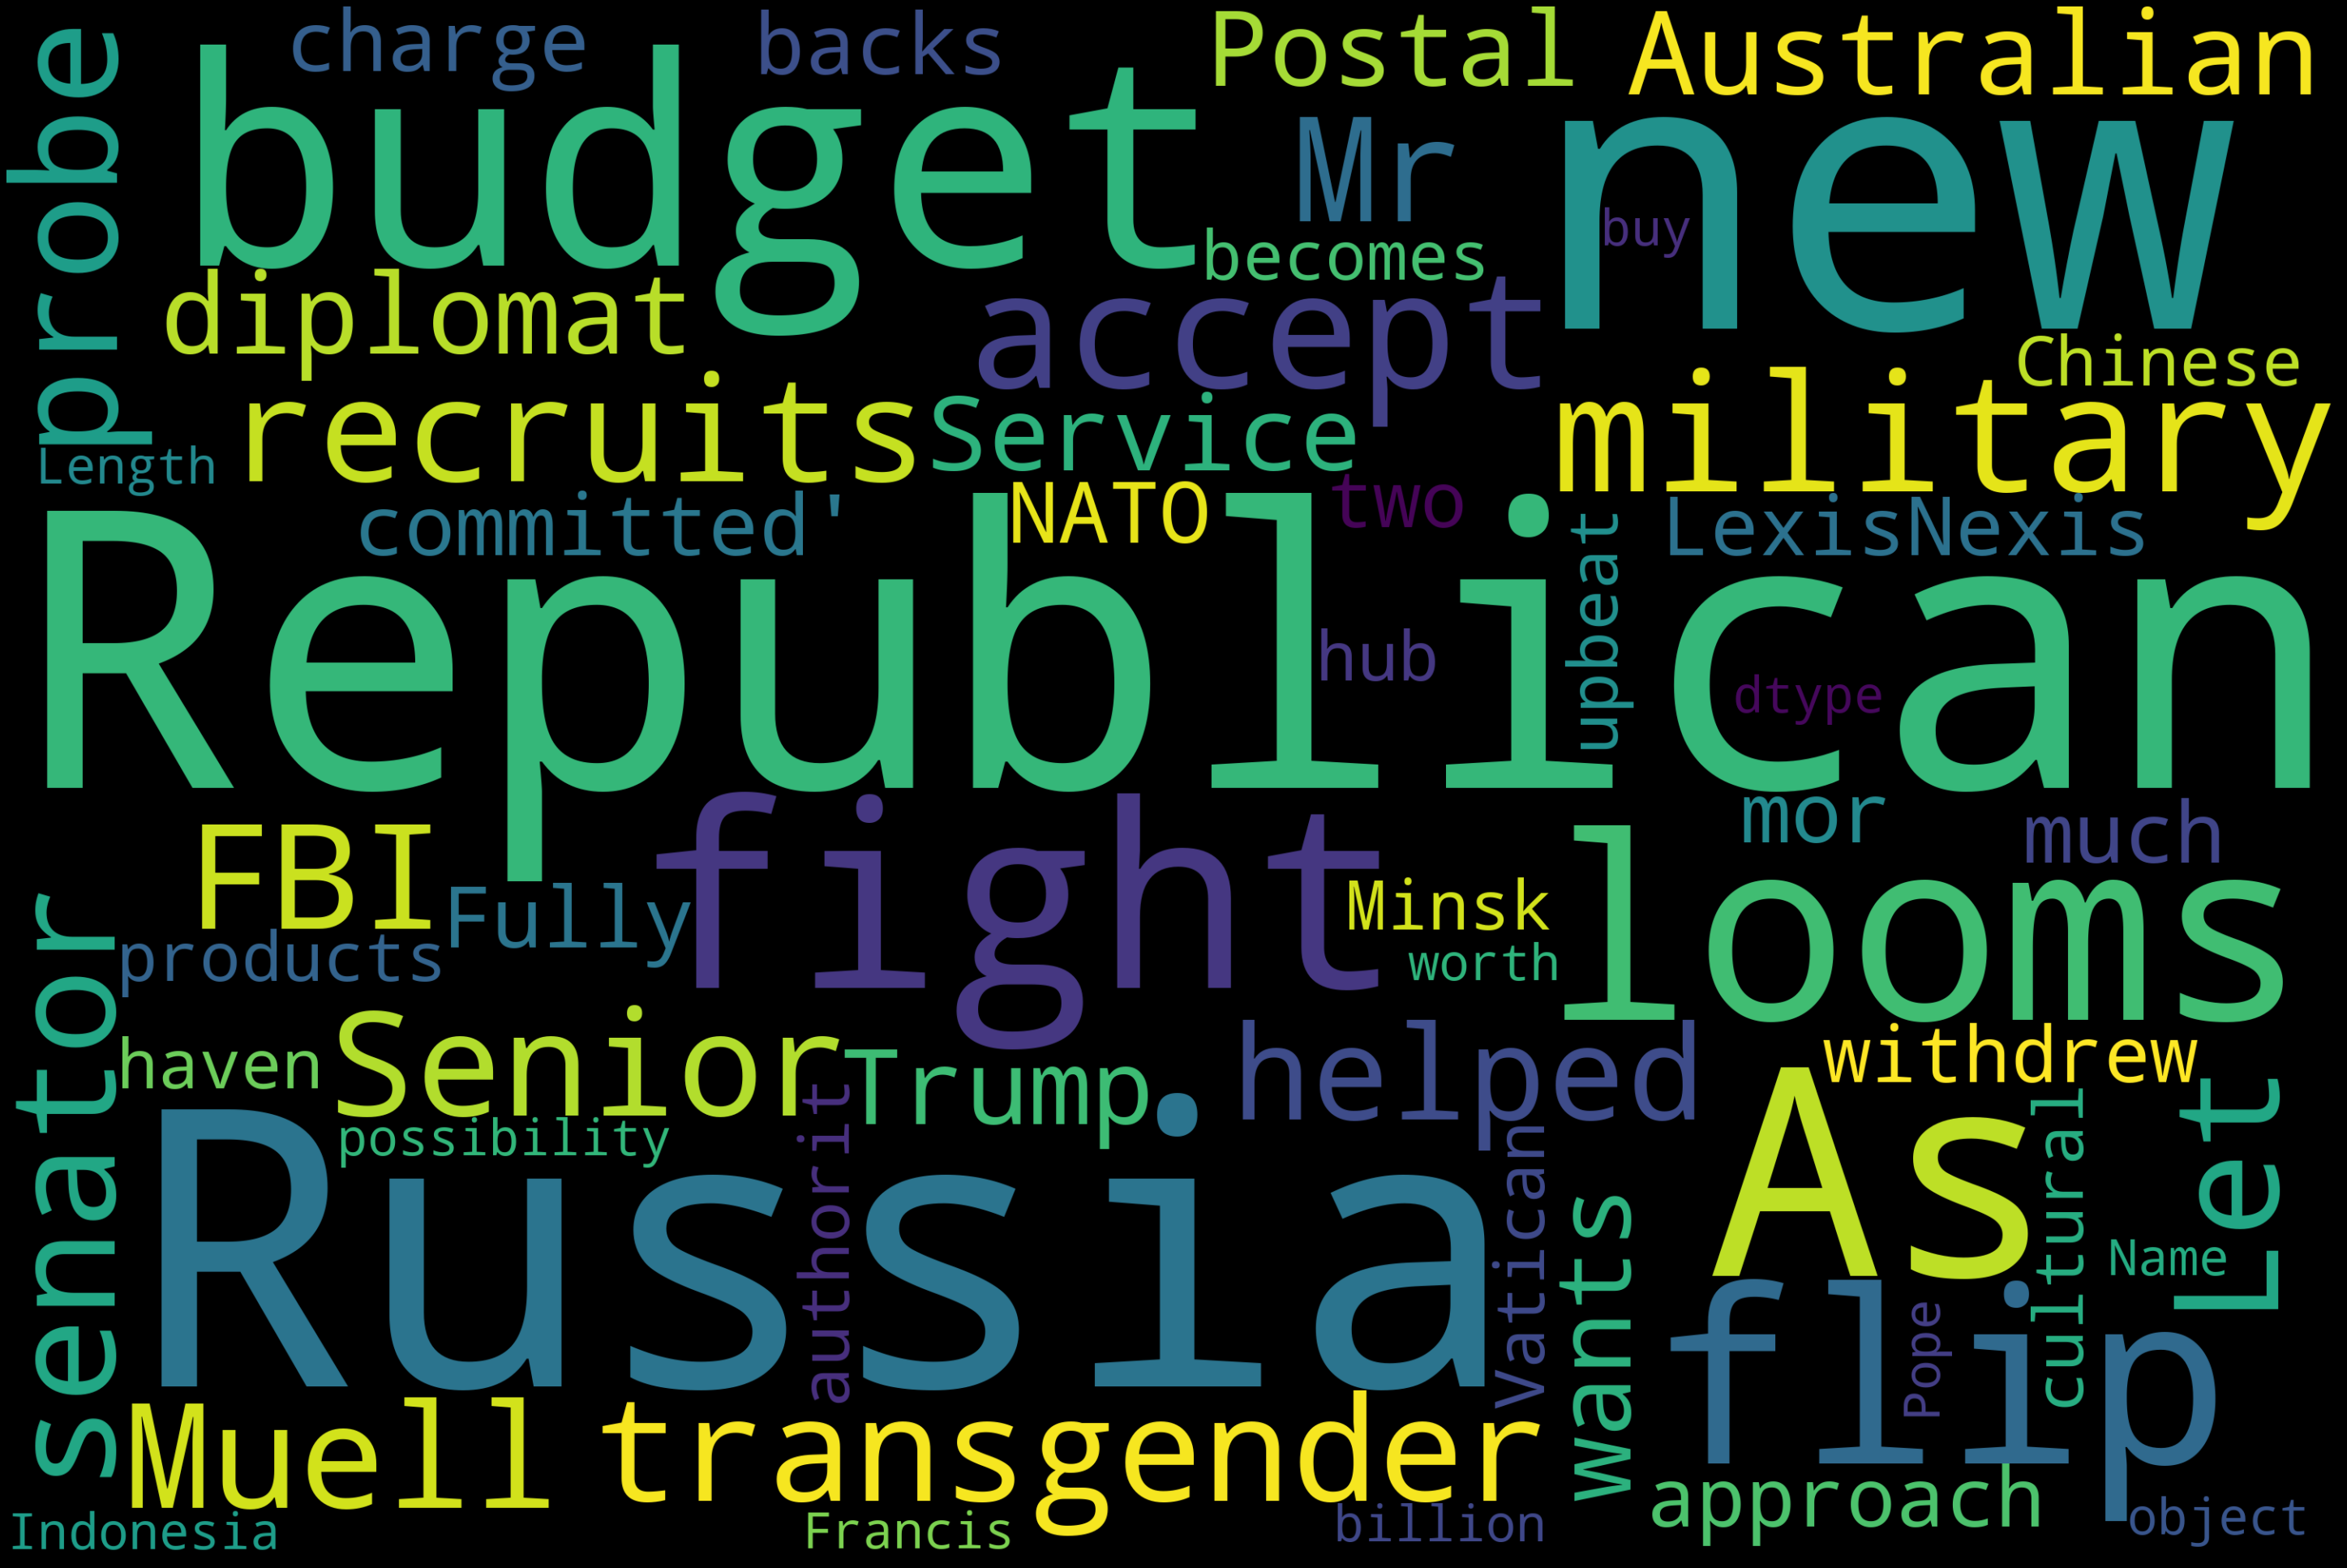

In [29]:
text = true_news["news"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

发现：

- 真正的新闻对共和党和俄罗斯并没有多大的帮助 
- 有关于预算案的消息，军事消息也受到政府的消息报道

## 时间序列分析-虚假/真实新闻 

让我们看一下在媒体上传播的真假新闻的时间表。

In [30]:
# 创建时间的数量统计
fake=fake_news.groupby(['date'])['output'].count()
fake=pd.DataFrame(fake)

true=true_news.groupby(['date'])['output'].count()
true=pd.DataFrame(true)

#Plotting the time series graph
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=true.index,
         y=true['output'],
         name='True',
    line=dict(color='blue'),
    opacity=0.8))

fig.add_trace(go.Scatter(
         x=fake.index,
         y=fake['output'],
         name='Fake',
    line=dict(color='red'),
    opacity=0.8))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
        
    
fig.update_layout(title_text='True and Fake News',plot_bgcolor='rgb(248, 248, 255)',yaxis_title='Value')

fig.show()

发现：
- 自2017年8月以来，真正的新闻就占据了主导地位。因为它们的出现率很高。这是一个好兆头

- 真实消息中的异常值高于虚假消息的异常值很少（2016年11月9日和2017年4月7日）

- 我们的数据集包含的假新闻比真实新闻多，因为我们可以看到我们没有整个2015年的真实新闻数据，因此，假新闻分类将比对真实新闻进行分类更为准确

## Stemming & Vectorizing

词干化新闻

词干提取是从变形词中得出词根的一种方法。 在这里，我们提取评论并将评论中的单词转换为其根词。 例如，

- Going->go
- Finally->fina

如果您注意到，则词根无需带有语义。 还有另一种称为“词法化”的技术，它可以将单词转换为具有语义含义的词根。

In [31]:
news_features=clean_news.copy()
news_features=news_features[['news']].reset_index(drop=True)
news_features.head()

,news
0,donald trump sends embarrassing new year’s eve...
1,drunk bragging trump staffer started russian c...
2,sheriff david clarke becomes internet joke thr...
3,trump obsessed even obama’s name coded website...
4,pope francis called donald trump christmas spe...


In [32]:
stop_words = set(stopwords.words("english"))
# 词干化
ps = PorterStemmer()

# 分词然后词干化
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['news'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news)   

In [33]:
corpus[1]

'drunk brag trump staffer start russian collus investigationhous intellig committe chairman devin nune go bad day assumpt like mani us christoph steeledossi prompt russia investig lash depart justic fbi order protect trump happen dossier start investig accord document obtain new york timesform trump campaign advis georg papadopoulo drunk wine bar reveal knowledg russian opposit research hillari clintonon top papadopoulo covfef boy trump administr alleg much larger role none damn drunken fool wine bar coffe boy help arrang new york meet trump presid abdel fattah elsisi egypt two month elect known former aid set meet world leader trump team trump ran mere coffe boyin may papadopoulo reveal australian diplomat alexand downer russian offici shop around possibl dirt thendemocrat presidenti nomine hillari clinton exactli much mr papadopoulo said night kensington wine room australian alexand downer unclear report state two month later leak democrat email began appear onlin australian offici p

这是现在的样子，因为计算机无法理解单词及其词义，我们需要将这些单词转换为1和0。为了对其进行编码，我们使用TFIDF

## TFIDF(Term Frequency — Inverse Document Frequency)

TF-IDF代表“词语频率-反向文档频率”。 这是一种量化文档中单词的技术，我们通常计算每个单词的权重，表示该单词在文档和语料库中的重要性。 此方法是信息检索和文本挖掘中广泛使用的技术。

在这里，我们将bigram（两个单词）分开并考虑它们的总权重，而且我们只从新闻中提取前5000个单词。

In [34]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TFIDF矩阵
X= tfidf_vectorizer.fit_transform(news_features['news'])
X.shape

(44888, 5000)

In [35]:
#目标列
y=clean_news['output']

In [36]:
print(f'Original dataset shape : {Counter(y)}')

Original dataset shape : Counter({0: 23471, 1: 21417})


In [37]:
## 创建train或者test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## 模型构建：Logistics Regression 假新闻分类器
因为我们已经成功处理了文本数据，所以这不仅仅是正常的机器学习问题。我们从稀疏矩阵中预测目标特征中的类。

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 模型选择

首先使用交叉验证选择最佳的成型模型。 让我们考虑所有分类算法并执行模型选择过程

注意：我没有在此算法中包含SVM，因为在设备中进行培训需要花费很多时间

In [39]:
# 创建分类器
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
nb_cv=MultinomialNB(alpha=0.1) 
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,nb_cv]

# 准确率
for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.9660040199274997
Decision Tree Test Accuracy: 0.9347925003047657
KNN Test Accuracy: 0.613172841991654
Naive Bayes Test Accuracy: 0.9373328405462511


### 参数调整

In [41]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=24.420530945486497, random_state=0)
The mean accuracy of the model is: 0.9803065407235787


In [42]:
logreg = LogisticRegression(C=24.420530945486497, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


### 混淆矩阵

Confusion matrix, without normalization


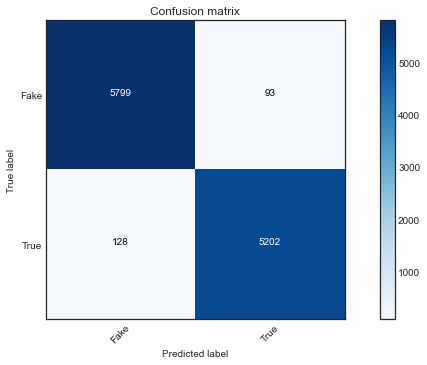

In [44]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake','True'])

### 分类报告

In [45]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      5892
           1       0.98      0.98      0.98      5330

    accuracy                           0.98     11222
   macro avg       0.98      0.98      0.98     11222
weighted avg       0.98      0.98      0.98     11222



### ROC-AUC Curve

这是一条非常重要的曲线，我们可以根据客观标准来决定要设置的阈值

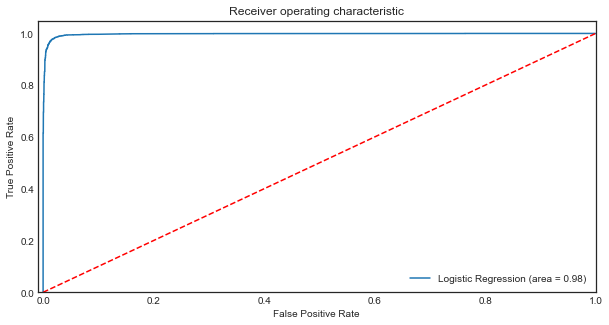

In [47]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## 深度学习模型-LSTM

在本部分中，我们使用神经网络来预测给定新闻是否为假新闻。

我们不会使用像ANN这样的普通神经网络来分类，而是使用LSTM（长期短期记忆）来帮助包含序列信息。长期短期记忆（LSTM）网络是一种能够学习序列依赖的递归神经网络。 序列预测问题。 这是机器翻译，语音识别等复杂问题域中所需的行为。

### 嵌入层-One Hot编码

In [48]:
# 词汇表大小
voc_size=10000

#One hot 编码
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

### 对齐序列

In [49]:
clean_news['word_count'].describe()

count    44888.000000
mean       237.051907
std        198.796232
min          3.000000
25%        124.000000
50%        210.000000
75%        294.000000
max       4831.000000
Name: word_count, dtype: float64

In [50]:
# 设置序列长度
sent_length=5000

# 补齐
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 3061 6048 7061]
 [   0    0    0 ... 5721 4842 7061]
 [   0    0    0 ... 5552 4139 7061]
 ...
 [   0    0    0 ... 7960 9583 8051]
 [   0    0    0 ... 5323 5417 3542]
 [   0    0    0 ... 8286 7502 4272]]


### LSTM模型

In [51]:
#构建lstm模型
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100)) # 100
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

# 编译模型
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5000, 40)          400000    
_________________________________________________________________
dropout (Dropout)            (None, 5000, 40)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
len(embedded_docs),y.shape

(44888, (44888,))

### 模型训练

In [53]:
# 转换X和y
X_final=np.array(embedded_docs)
y_final=np.array(y)

# X和y大小
X_final.shape,y_final.shape

((44888, 5000), (44888,))

In [54]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# epochs设置为10 batch size大小为64
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
470/470 [==============================] - ETA: 0s - loss: 0.2214 - accuracy: 0.9109WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000230B85A6828> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

### 模型评估

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Confusion matrix, without normalization


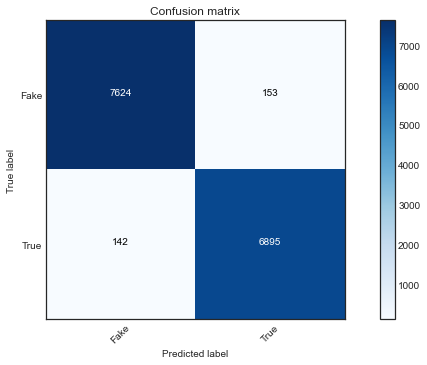

In [55]:
# 测试集数据预测
y_pred=model.predict_classes(X_test)

# 混淆矩阵
# confusion_matrix(y_test,y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,classes=['Fake','True'])

In [56]:
accuracy_score(y_test,y_pred)

0.9800864047522614

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7777
           1       0.98      0.98      0.98      7037

    accuracy                           0.98     14814
   macro avg       0.98      0.98      0.98     14814
weighted avg       0.98      0.98      0.98     14814



### Bidirectional LSTM

Bi-LSTM是标准LSTM的扩展，具有两个独立的RNN。 普通的LSTM是单向的，它无法知道将来的单词，而在Bi-LSTM中，我们可以预测单词的未来使用，因为存在从另一RNN层反向传递的反向信息。

与LSTM相比，代码只做了一个更改，这里我们使用Bidirectional（）函数并在内部调用LSTM。

In [58]:
# 
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100))) # Bidirectional LSTM layer
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5000, 40)          400000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 513,001
Trainable params: 513,001
Non-trainable params: 0
_________________________________________________________________
None


### 双向LSTM模型的拟合与评估 
现在让我们将双向LSTM模型拟合到我们拥有的数据之前具有相同参数的数据上

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Confusion matrix, without normalization


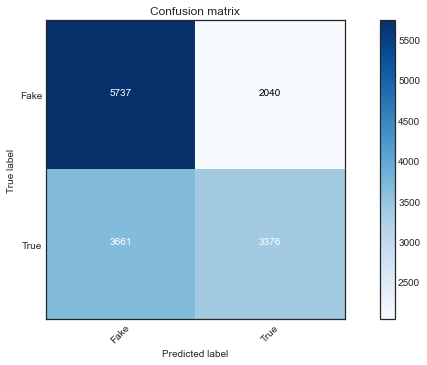

In [59]:
# 测试集
y_pred1=model1.predict_classes(X_test)

# 混淆矩阵
cm = metrics.confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(cm,classes=['Fake','True'])

In [62]:
# 准确率
accuracy_score(y_test,y_pred1)

0.615161333873363

In [61]:
# 分类报告
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.61      0.74      0.67      7777
           1       0.62      0.48      0.54      7037

    accuracy                           0.62     14814
   macro avg       0.62      0.61      0.61     14814
weighted avg       0.62      0.62      0.61     14814



## 结论
我们已经在处理数据和构建模型方面进行了主流工作。 我们本可以在向量化文本数据的同时沉迷于更改ngram。 我们拿了2个字并将其向量化。 您可以通过同时考虑1和2个单词来检查Shreta在同一数据集上的工作，她在LSTM和Bi-LSTM网络的帮助下获得了更好的结果。让我们讨论数据集的一般见解。

大多数虚假新闻都被选举新闻和特朗普所包围。 考虑到2020年美国大选。有传播假新闻的机会，将非常需要这些技术的应用。
假新闻目前在这种大流行情况中根深蒂固，以打政治，恐吓人们并强迫他们购买商品
大多数新闻来自路透社。 我们不知道这种新闻媒体是否受到政治影响。 因此，我们应始终考虑新闻来源，以查找新闻是虚假还是真实。